# Сборный проект 1

Для интернет-машгазина игр необходимо выявить закономерности, определяющие успешность игр. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы
планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation).

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

## Откроем файл с данными и изучим общую информацию

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
pth1 = 'games.csv'
pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [5]:
print(data.info(),'\n')
print('******************************************************************************')
display(data)
print('***********************')
print('Пропуски в данных', '\n')
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None 

******************************************************************************


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


***********************
Пропуски в данных 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


В именах столбцов обнаружен разный регистр, пропуски данных, неверный тип значений столбцов.

## Подготовим данные

In [7]:
data.columns=data.columns.str.lower()
print(data.isnull().sum())
print("\n",'Проверим, одинаковые ли строки с пропусками в столбцах name и genre')
display(data[data['name'].isnull()])
#Пропуски в стобцах name и genre можно удалить, тк доля значений мала = 2/16714
#Пропуски в столбце year_of_release можно также удалить
data = data.dropna(subset=['name','year_of_release']).reset_index(drop=True) 
print(data.isnull().sum())
data['year_of_release']=data['year_of_release'].astype(int) #Переводим в int, тк год - целочисленное значение
#Пропуски в оценках игр могут быть тк:
#игра только вышла (для пользователей)
#игра непопулярна (для рейтинговых агенств)
#игра не популярна и только вышла (для всех)
#игра уже устарела и о ней забыли или не вспомнили (для старых игр)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

 Проверим, одинаковые ли строки с пропусками в столбцах name и genre


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [10]:
#Разберемся с значениями tbd в колонке и поменяем тип данных на float в user_score
display(data[data['user_score']=="tbd"])
# В сети пишут, что "tbd" это аббревиатура "to be discussed/determined", то есть "подлежит определению", то есть еще не оценена. Значит поставим пропуски вместо аббревиатуры.
data['user_score']=data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')
data['user_score']=data.loc[:,'user_score']*10 #Приведем к 100-бальной системе, для удобства и единообразия (или сравнения с оценками критиков)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [11]:
#Глянем на дубликаты
data.duplicated().sum()
#А их и нет

0

In [12]:
#Пропуски в critic_score, user_score заполним значением, не входищим в диапазон 0-100, проще взять -1, чтобы, в случае построения графика, заметить отрицательные значения вовремя
data['user_score']=data['user_score'].fillna(-1)
data['critic_score']=data['critic_score'].fillna(-1)
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

In [13]:
#Столбец rating заполним значением miss
data['rating'].fillna('miss')
#Но лучше было бы, если бы был столбец в возрастной категорией

0           E
1        miss
2           E
3           E
4        miss
         ... 
16439    miss
16440    miss
16441    miss
16442    miss
16443    miss
Name: rating, Length: 16444, dtype: object

In [14]:
#Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец all_sales
data['all_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ данных

In [16]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN,0.01


Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды

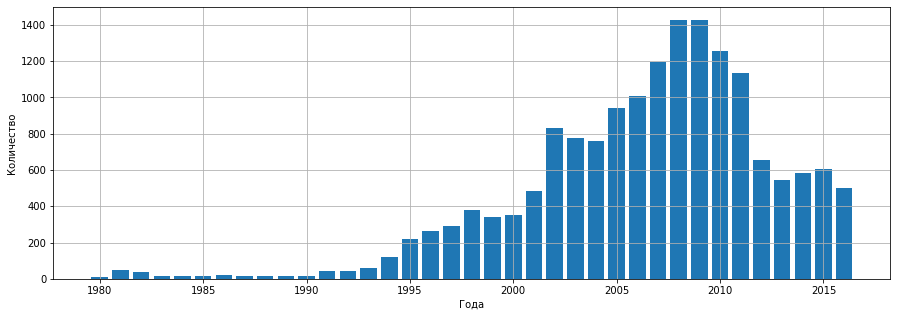

In [18]:
#Для наглядности построим график
stat_release=data.groupby('year_of_release')['name'].count().reset_index()
stat_release.columns=['year','count']
plt.figure(figsize=(15,5))
plt.bar(stat_release['year'], stat_release['count'])
plt.xlabel('Года')
plt.ylabel('Количество')
plt.grid()

Истоки игростроения 1980-1995г, в 2010 скорее всего все просело из-за крисзиса 2008 г. 

In [20]:
#Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.
stat_platform=data.groupby('platform')['all_sales'].sum().sort_values().reset_index()
stat_platform

,platform,all_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


Text(0, 0.5, 'Суммарные продажи')

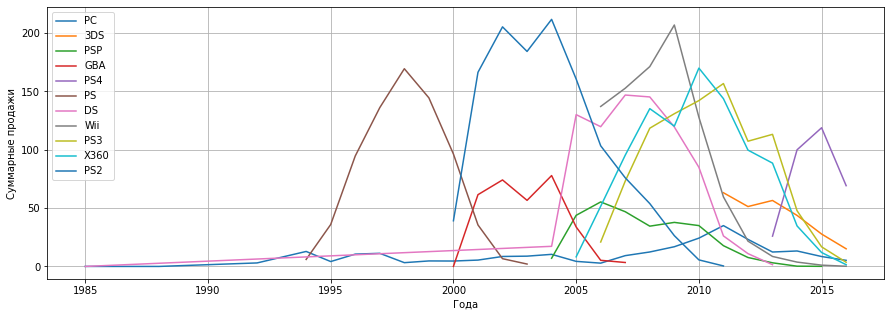

In [21]:
maxi=stat_platform.loc[20:30,'platform'].values
maxi
plt.figure(figsize=(15,5))
for idx in range (0,len(maxi)):
    platform=data.query('platform==@maxi[@idx]').groupby('year_of_release')['all_sales'].sum()
    platform.plot(x=platform.index, y=platform.values,label=maxi[idx])
plt.grid()
plt.legend()
plt.xlabel('Года')
plt.ylabel('Суммарные продажи')

In [22]:
# пример кода к комментарию ревьюера
top10 = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).reset_index().head(10)
top10

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Жизненный цикл платформы около 8 лет.

In [25]:
predict_2017=data.pivot_table(index='year_of_release', columns ='platform', values='all_sales', aggfunc='sum')
predict_2017=predict_2017.query('year_of_release>2013').fillna(0).reset_index()
predict_2017

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,2014,0.0,0.0,43.76,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.75,22.03,34.74,0.0,54.07
1,2015,0.0,0.0,27.78,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.14,16.35,11.96,0.0,60.14
2,2016,0.0,0.0,15.14,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.18,4.60,1.52,0.0,26.15


In [26]:
#Уберем те платформы, по которым нет продаж
for idx in predict_2017.columns:
    if predict_2017[idx].sum()==0:
        predict_2017.drop(idx, axis=1,inplace=True)
predict_2017

platform,year_of_release,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
1,2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2,2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


Text(0, 0.5, 'Суммарные продажи')

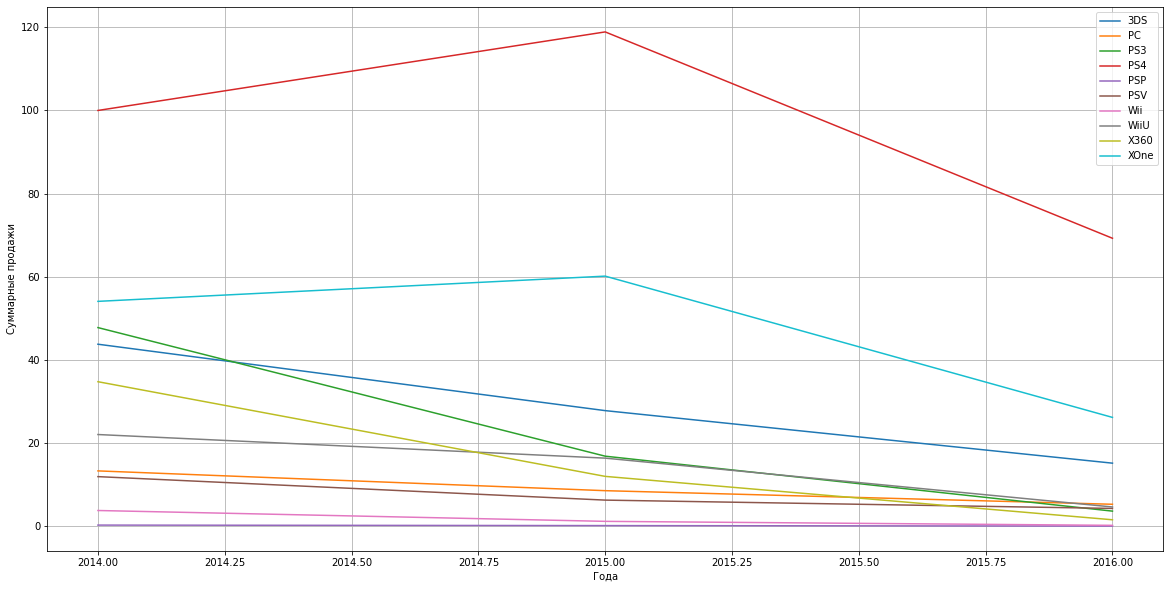

In [27]:
plt.figure(figsize=(20,10))

for idx in predict_2017.columns[1:]:
     plt.plot(predict_2017['year_of_release'].to_list(), predict_2017[idx].to_list(),label=idx)

plt.grid()
plt.legend()
plt.xlabel('Года')
plt.ylabel('Суммарные продажи')

PS4 и Xbox One начинают свой рост, но почему-то падают в 2015 году, при этом являясь самыми перспективными.
На текущий год они и лидируют. При этом PC остается в малых значениях. 
Большинство платформ заканчивают свой цикл к 2015 г.


In [29]:
#Выберем потенциально прибыльные платформы и построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
profitable=data.query('year_of_release>2013').groupby('platform')['all_sales'].sum().sort_values(ascending=False).reset_index()
#Возьмем первые 5 платформ
profitable

,platform,all_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


In [30]:
#Переменная plan содержит в себе данные с 2014, как актуальные для анализа.
plan=data.query('year_of_release >2013')

(0.0, 1.0)

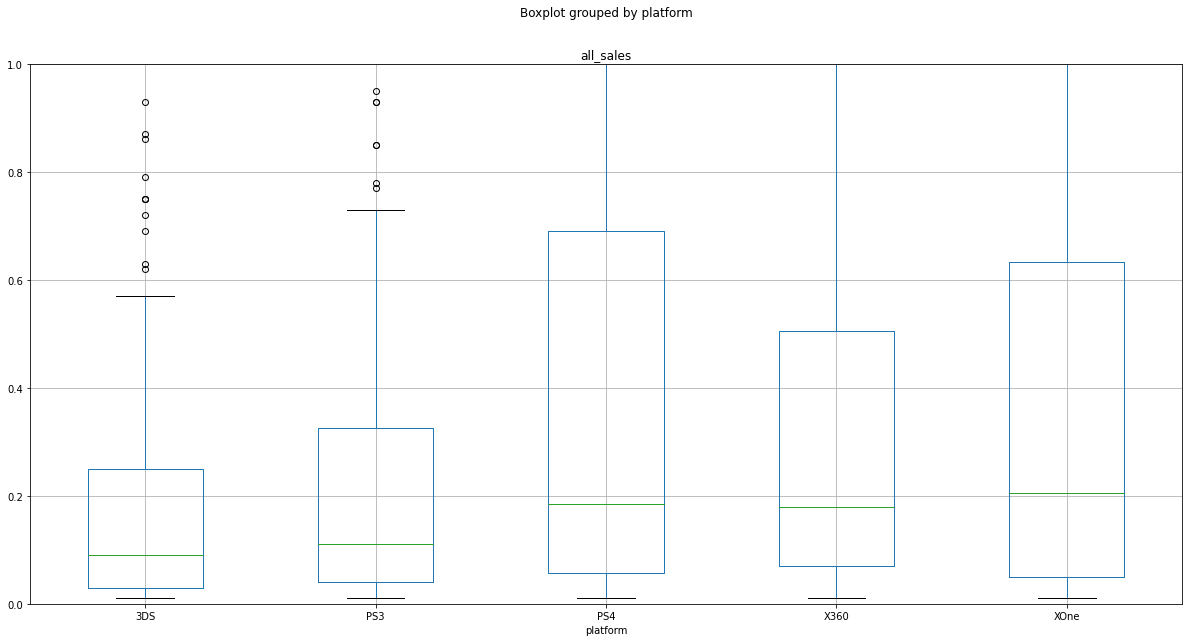

In [31]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

query_top_pl=("platform in ['PS4', 'XOne', '3DS', 'PS3', 'X360']")
data_query = plan.query(query_top_pl)
by_column = query_top_pl.split()[0]
ax = data_query.boxplot(column='all_sales', by=by_column,  figsize=(20,10))
plt.ylim(0, 1)


По продажам лидируют PS4 и XOne, X360 расположилась на 3-ем месте, PS3 и 3DS замыкают топ 5. Имеет смысле оставить топ 3 актуальных платформ.

Посмотрим, как влияют на продажи отзывы внутри одной популярной платформы (PS4)

In [34]:
ps4=plan.query('platform=="PS4" & (user_score > 0) & (critic_score > 0)')[['all_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
print('Влияние отзывов критиков на продажи внутри платформы PS4 =',ps4['all_sales'].corr(ps4['critic_score']))

Влияние отзывов критиков на продажи внутри платформы PS4 = 0.40190287811475334


(10.0, 100.0)

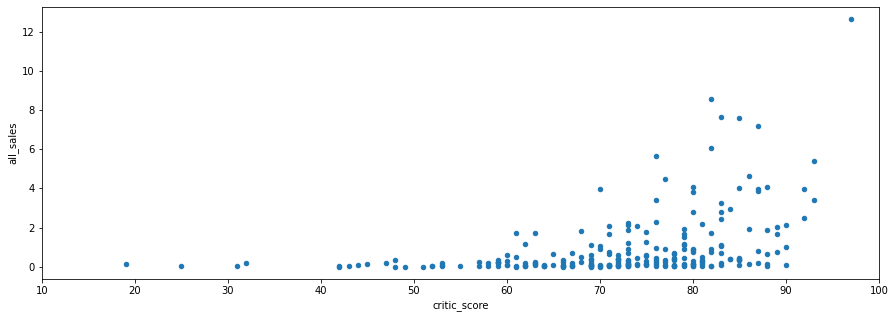

In [35]:
ps4.plot(x='critic_score',y='all_sales',kind='scatter',figsize=(15,5))
plt.xlim(10, 100)

Влияние отзывов игроков на продажи внутри платформы PS4 = -0.0431858599719363


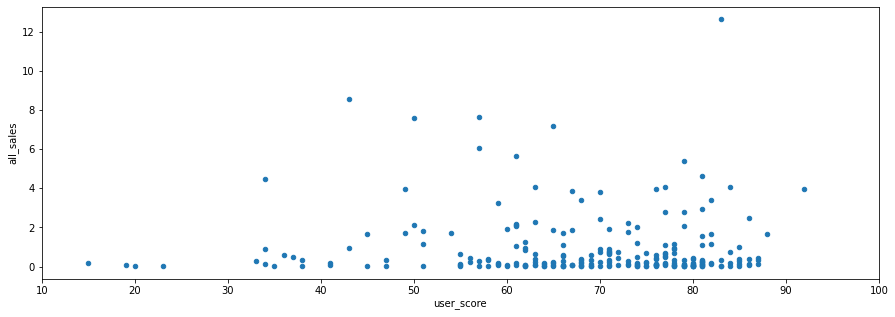

In [36]:
ps4.plot(x='user_score',y='all_sales',kind='scatter',figsize=(15,5))
plt.xlim(10, 100)
print('Влияние отзывов игроков на продажи внутри платформы PS4 =',ps4['all_sales'].corr(ps4['user_score']))

Люди верят отзывам критиков.

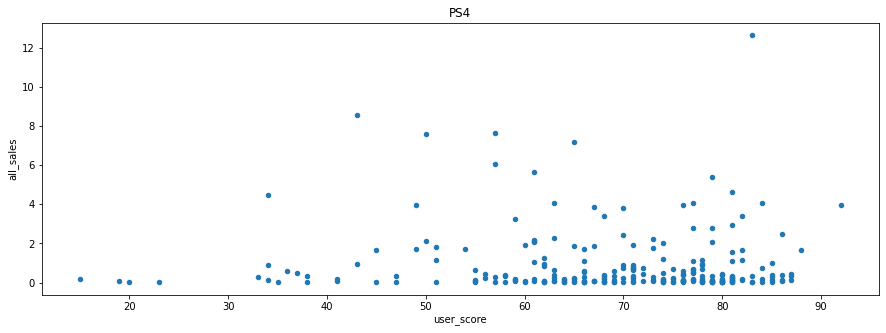

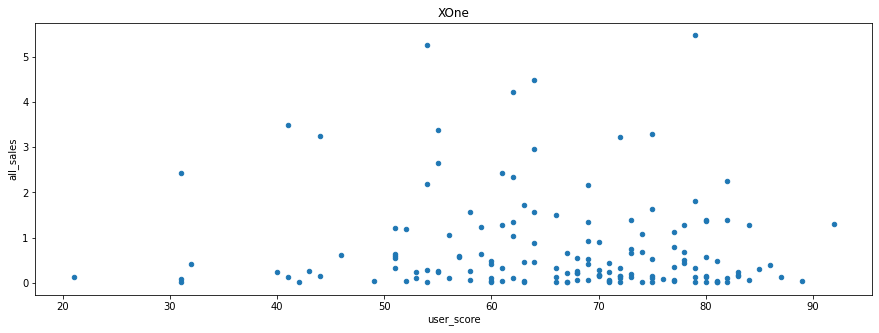

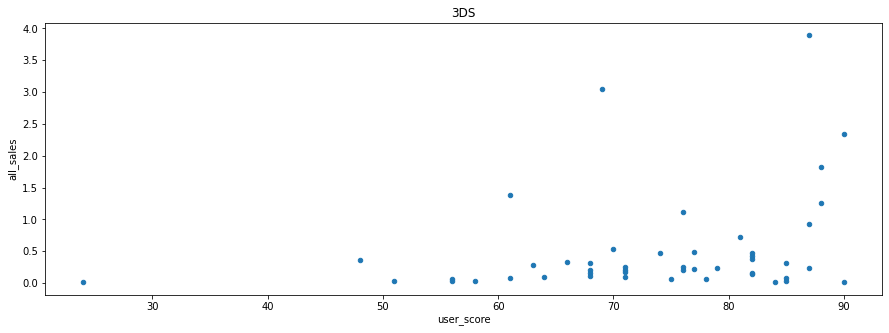

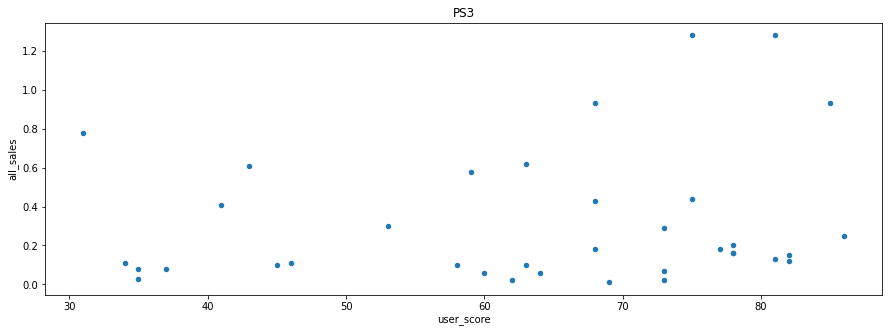

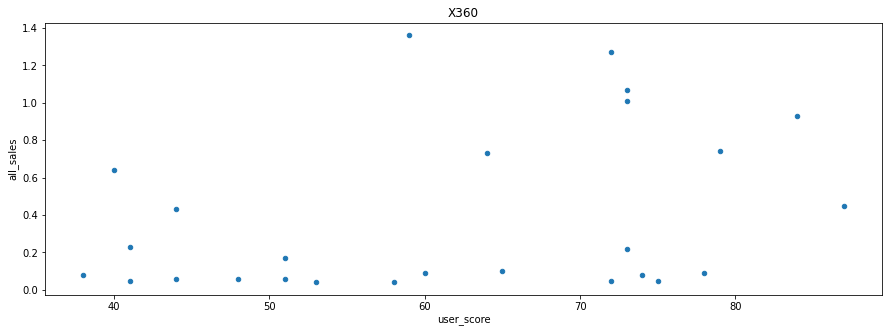

In [38]:
top5=profitable['platform'].head(5)

for i in top5:
    top5_corr=plan.query('platform==@i & (user_score > 0) & (critic_score > 0)')[['all_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True).plot(x='user_score',y='all_sales',kind='scatter',figsize=(15,5))
    plt.title(i)

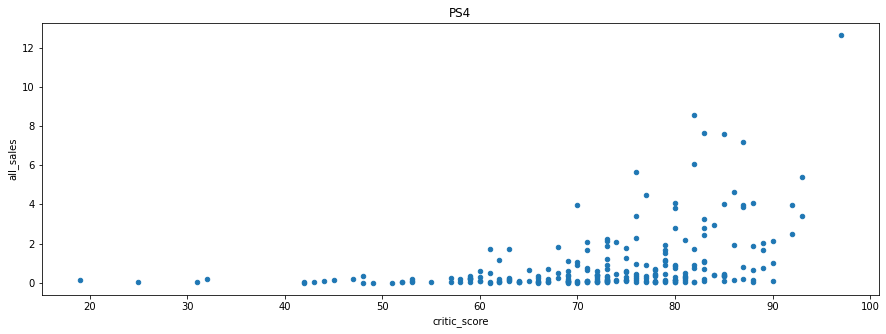

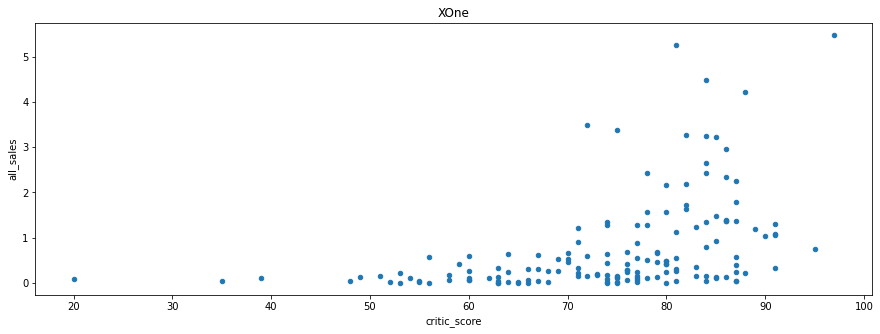

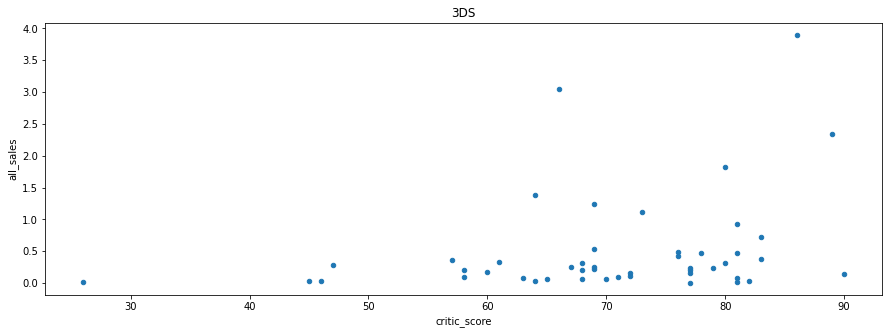

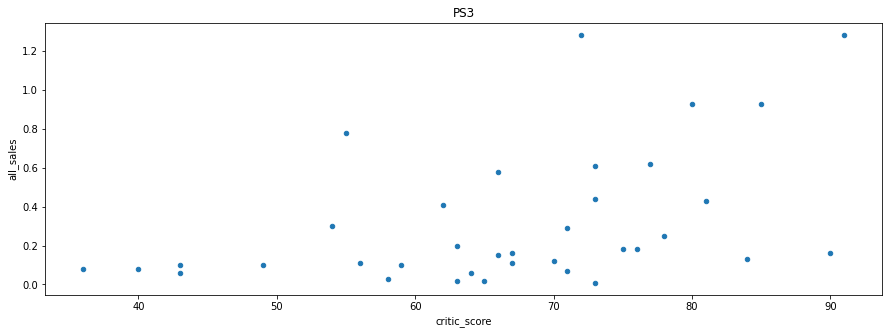

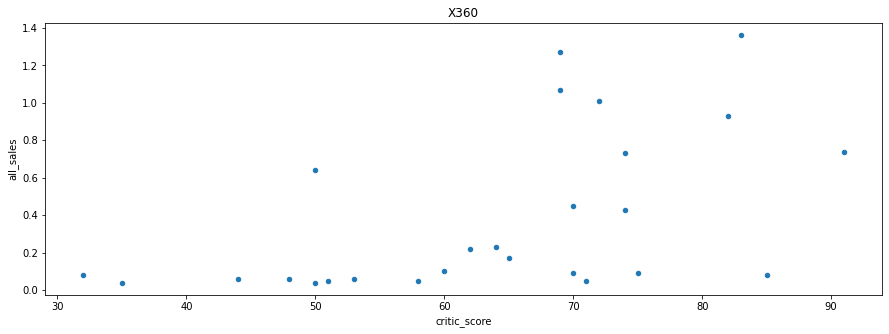

In [39]:
top5=profitable['platform'].head(5)

for i in top5:
    top5_corr=plan.query('platform==@i & (user_score > 0) & (critic_score > 0)')[['all_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True).plot(x='critic_score',y='all_sales',kind='scatter',figsize=(15,5))
    plt.title(i)

In [40]:
all5=profitable.head(5)
all5

,platform,all_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22


In [41]:
ano=plan.query('(platform != "PS3") & (user_score > 0) & (critic_score > 0)')[['all_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)

In [42]:
top5

0     PS4
1    XOne
2     3DS
3     PS3
4    X360
Name: platform, dtype: object

Цифра 3 в названии платформы 3DS мешала в расчетах, появлялась ошибка, поэтому заменил ее на T-Three.

In [45]:
plan[plan['platform']=='3DS'].count().sum()


2406

In [46]:
plan=plan.replace({'platform' : {'3DS' : 'TDS'}})

In [47]:
plan[plan['platform']=='TDS'].count().sum()


2406

In [48]:
PS4=plan.query('platform=="PS4" & (user_score > 0) & (critic_score > 0)')[['all_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
print('Влияние отзывов критиков на продажи внутри платформы PS4 =',PS4['all_sales'].corr(PS4['critic_score']))
print('Влияние отзывов игроков на продажи внутри платформы PS4 =',PS4['all_sales'].corr(PS4['user_score']))

XOne=plan.query('platform=="XOne" & (user_score > 0) & (critic_score > 0)')[['all_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
print('Влияние отзывов критиков на продажи внутри платформы XOne =',XOne['all_sales'].corr(XOne['critic_score']))
print('Влияние отзывов игроков на продажи внутри платформы XOne =',XOne['all_sales'].corr(XOne['user_score']))

TDS=plan.query('platform=="TDS" & (user_score > 0) & (critic_score > 0)')[['all_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
print('Влияние отзывов критиков на продажи внутри платформы TDS =',TDS['all_sales'].corr(TDS['critic_score']))
print('Влияние отзывов игроков на продажи внутри платформы TDS =',TDS['all_sales'].corr(TDS['user_score']))

PS3=plan.query('platform=="PS3" & (user_score > 0) & (critic_score > 0)')[['all_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
print('Влияние отзывов критиков на продажи внутри платформы PS3 =',PS3['all_sales'].corr(PS3['critic_score']))
print('Влияние отзывов игроков на продажи внутри платформы PS3 =',PS3['all_sales'].corr(PS3['user_score']))

X360=plan.query('platform=="X360" & (user_score > 0) & (critic_score > 0)')[['all_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
print('Влияние отзывов критиков на продажи внутри платформы X360 =',X360['all_sales'].corr(X360['critic_score']))
print('Влияние отзывов игроков на продажи внутри платформы X360 =',X360['all_sales'].corr(X360['user_score']))

Влияние отзывов критиков на продажи внутри платформы PS4 = 0.40190287811475334
Влияние отзывов игроков на продажи внутри платформы PS4 = -0.0431858599719363
Влияние отзывов критиков на продажи внутри платформы XOne = 0.4221118510555765
Влияние отзывов игроков на продажи внутри платформы XOne = -0.09173434503310758
Влияние отзывов критиков на продажи внутри платформы TDS = 0.28468579095782925
Влияние отзывов игроков на продажи внутри платформы TDS = 0.27984987925032806
Влияние отзывов критиков на продажи внутри платформы PS3 = 0.44657460493190704
Влияние отзывов игроков на продажи внутри платформы PS3 = 0.15659516181359964
Влияние отзывов критиков на продажи внутри платформы X360 = 0.5257228356581523
Влияние отзывов игроков на продажи внутри платформы X360 = 0.3365136248359932


Отзывы критиков влияют на продажи больше отзывов игроков, не считая платформ TDS, X360, но корреляция невысокая у всех.

In [51]:
#Общие данные по продажам в зависимости от жанра
plan.pivot_table(index='genre',values='all_sales', aggfunc=['max','mean','median']).sort_values(('median','all_sales'), ascending=False)

,max,mean,median
,all_sales,all_sales,all_sales
genre,,,
Shooter,14.63,1.335469,0.515
Sports,8.58,0.680000,0.180
Platform,3.21,0.476053,0.140
Fighting,7.55,0.470333,0.125
Role-Playing,11.68,0.459005,0.110
Simulation,3.05,0.298409,0.100
Action,12.62,0.322068,0.090
Misc,5.27,0.332301,0.090


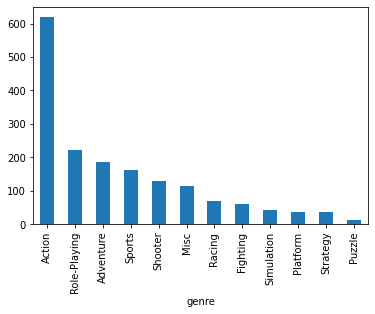

Text(0, 0.5, '')

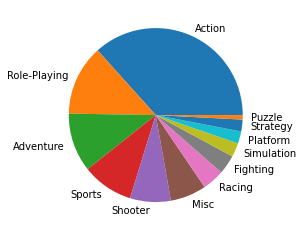

In [52]:
#Количество и доли игр по жанрам
count_games_genre=plan.groupby('genre')['name'].count().sort_values(ascending=False)
plt.show(count_games_genre.plot(kind="bar"))
count_games_genre.plot(kind="pie")
plt.ylabel('')

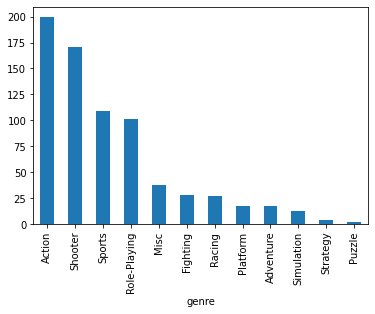

Text(0, 0.5, '')

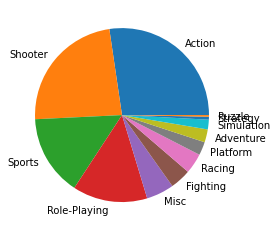

In [53]:
#Количесто и доли продаж по жанрам
count_sales_genre=plan.groupby('genre')['all_sales'].sum().sort_values(ascending=False)
plt.show(count_sales_genre.plot(kind="bar"))
count_sales_genre.plot(kind="pie")
plt.ylabel('')

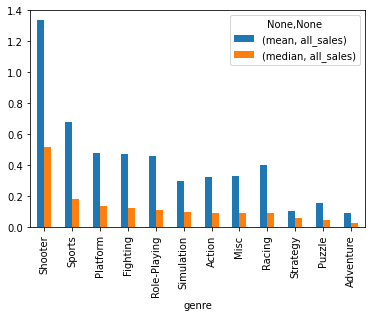

In [54]:
ppp=plan.pivot_table(index='genre', values='all_sales', aggfunc=['mean','median']).sort_values(('median','all_sales'), ascending=False)
plt.show(ppp.plot(kind="bar"))

По медианным и средним продажам лидируют шутеры, спортивные, платформеры, файтинги, ролевые.
Больше всего проданных игр в жанрах экшн, шутеры, спортивные и ролевые.
При этом, больше всего игр в жанрах экшн. Роле-плей и приключенческие заняли второе и третье места. Симуляторы, платформеры, стратегии и пазлы покупают меньше всех.

## Шаг 4 Составьте портрет пользователя каждого региона

<AxesSubplot:xlabel='platform'>

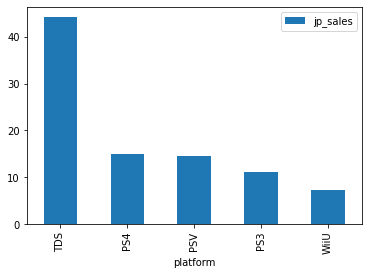

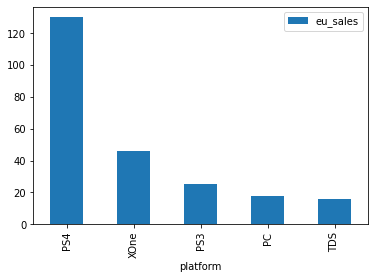

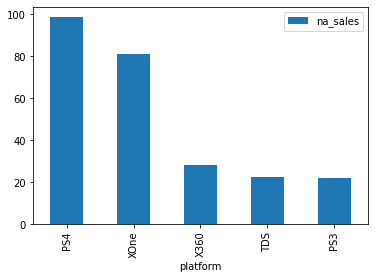

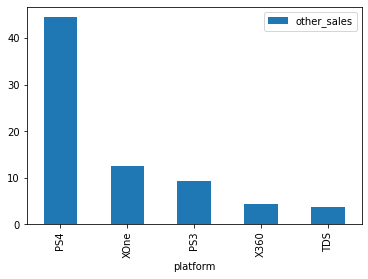

In [55]:
plan.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')
plan.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plan.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plan.groupby(by='platform').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False).head(5).plot(kind='bar')

В Японии популярна TDS (3DS). В Европе - PS4. В Америке - PS4 и XOne. В других регионах - PS4. При этом PS4 лидирует в трех крупных регионах.

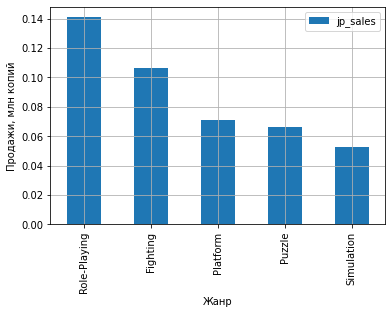

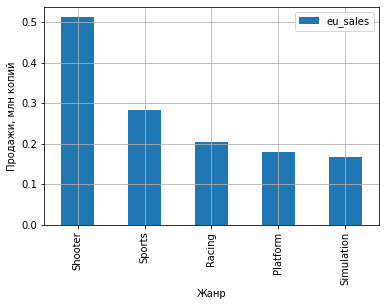

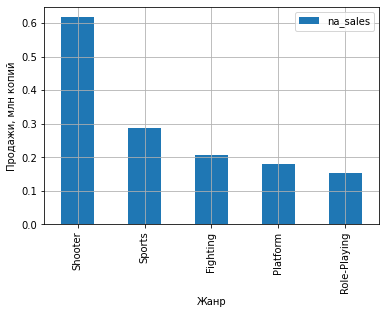

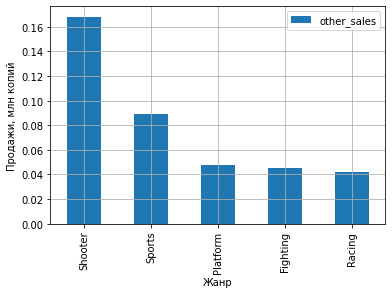

In [56]:
for i in ['jp_sales', 'eu_sales', 'na_sales', 'other_sales']:
    (
      plan
      .pivot_table(index='genre', values=i, aggfunc='mean')
      .sort_values(by=i, ascending=False)
      .head(5)
      .plot(kind='bar', grid=True)
  )
  plt.legend([i])
  plt.xlabel('Жанр')
  plt.ylabel('Продажи, млн копий')
  plt.show()

В среднем, в Японии лидируют ролевые игры, затем идут файтинги и платформеры.
В Европе лидируют шутеры, спортивные, гонки.
В Америке лидируют шутеры (почти в 2 раза, чем остальные), спортивные и файтинги.
В остальных регионах лидируют шутеры, спортивные и платформеры.

In [58]:
esrb=plan.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales',ascending=False)
esrb

/tmp/ipykernel_87/1204591888.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  esrb=plan.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales',ascending=False)


,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


In [59]:
plan['rating']=plan['rating'].astype(str)
esrb=plan.groupby('rating')['na_sales', 'eu_sales', 'jp_sales','other_sales'].sum().sort_values(by='na_sales',ascending=False)
esrb

/tmp/ipykernel_87/3807143321.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  esrb=plan.groupby('rating')['na_sales', 'eu_sales', 'jp_sales','other_sales'].sum().sort_values(by='na_sales',ascending=False)


,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
M,96.42,93.44,8.01,28.67
nan,64.72,58.95,56.90,18.40
E,50.74,58.06,8.94,15.39
T,38.95,34.07,14.78,11.33
E10+,33.23,26.16,4.46,7.83


In [60]:
# пример кода к комментарию ревьюера
esrb = plan.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales',ascending=False)
esrb

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
nan,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


array([<AxesSubplot:ylabel='na_sales'>, <AxesSubplot:ylabel='eu_sales'>,
       <AxesSubplot:ylabel='jp_sales'>], dtype=object)

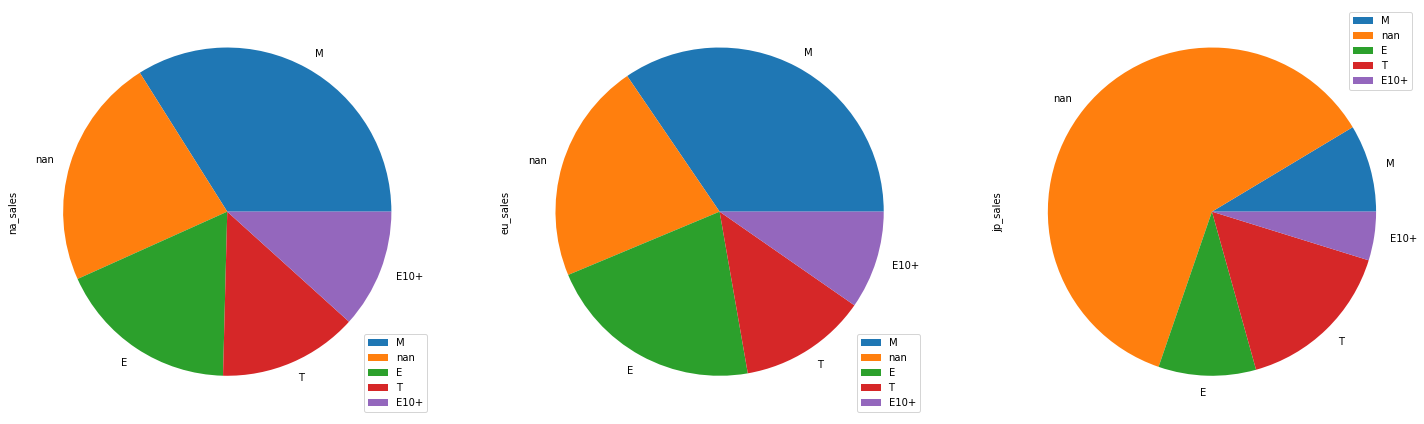

In [61]:
esrb.plot(kind='pie',subplots=True,figsize=(25,25))


В целом, рейтинг влияет на регионы одинаково, кроме Японии. В японии преобладают игры без рейтинга.
В Америке, Европе и другиех регионах преобладают игры с рейтингом М.

## Шаг 5 Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-
игры) и Sports (англ. «спортивные соревнования») разные.

Cформулируем нулевую и альтернативную гипотезы:
H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1 - Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [64]:
from scipy import stats as st
xone=plan.query('platform=="XOne" & (user_score > 0) & (critic_score > 0)')['user_score']
pc=plan.query('platform=="PC" & (user_score > 0) & (critic_score > 0)')['user_score']
results = st.ttest_ind(xone,pc, equal_var = False)
print('p-значение:', results.pvalue)
alpha=0.05
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14037851868269918
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

 Cформулируем нулевую и альтернативную гипотезы:
H0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
H1 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не одинаковые

In [65]:
action=plan.query(' genre=="Action" & (user_score >= 0) & (critic_score >= 0)')['user_score']
sports=plan.query('genre=="Sports" & (user_score >= 0) & (critic_score >= 0)')['user_score']
results = st.ttest_ind(action,sports, equal_var = False)
print('p-значение:', results.pvalue)
alpha=0.05
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.327612976032198e-09
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу.
Средние пользовательские рейтинги жанров Action и Sports не одинаковые.

## Общий вывод

При анализе датасета была выявлена низкая активность компаний-разработчиков игр в период до 90х годов,
рост с середины 90х годов и спад после 2010 года.
Жизненный цикл платформы составил около 8 лет, при этом, компьютеры актуальны были всегда, но не так популярны.
В 2017 году ставку надо делать на платформы PS4, XOne.
Отзывы влияют на продажи, но их влияние невысокое, тк корреляция несильная.
Игры жанров шутер и спорт популярнее других.
В регионах рейтинг влияет на продажи одинаково, не считая Японию, там популярнее игры без рейтинга.
Самые популярные платформы в регионах - PS4, XOne, 3DS.
Гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые, - принята.
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, - отвергнута.